# Power Outage Prediction

**Name(s)**: Serena Chen, Andy Guo

**Website Link**: (your website link)

In [110]:
import pandas as pd
import numpy as np

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from lec_utils import * # Feel free to uncomment and use this. It'll make your plotly graphs look like ours in lecture!

## Step 1: Introduction

In [111]:
# TODO

## Step 2: Data Cleaning and Exploratory Data Analysis

In [112]:
outage  = pd.read_excel("outage.xlsx",header = 5)
outage

,variables,OBS,YEAR,MONTH,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,Units,NaN,NaN,NaN,...,%,%,%,%
1,NaN,1.0,2011.0,7.0,...,0.6,91.59,8.41,5.48
2,NaN,2.0,2014.0,5.0,...,0.6,91.59,8.41,5.48
...,...,...,...,...,...,...,...,...,...
1532,NaN,1532.0,2009.0,8.0,...,0.15,98.31,1.69,1.69
1533,NaN,1533.0,2009.0,8.0,...,0.15,98.31,1.69,1.69
1534,NaN,1534.0,2000.0,NaN,...,0.02,85.76,14.24,2.9


In [113]:
outage['variables']

0       Units
1         NaN
2         NaN
        ...  
1532      NaN
1533      NaN
1534      NaN
Name: variables, Length: 1535, dtype: object

## Step 3: Framing a Prediction Problem

In [114]:
list(outage.columns)

['variables',
 'OBS',
 'YEAR',
 'MONTH',
 'U.S._STATE',
 'POSTAL.CODE',
 'NERC.REGION',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY',
 'OUTAGE.START.DATE',
 'OUTAGE.START.TIME',
 'OUTAGE.RESTORATION.DATE',
 'OUTAGE.RESTORATION.TIME',
 'CAUSE.CATEGORY',
 'CAUSE.CATEGORY.DETAIL',
 'HURRICANE.NAMES',
 'OUTAGE.DURATION',
 'DEMAND.LOSS.MW',
 'CUSTOMERS.AFFECTED',
 'RES.PRICE',
 'COM.PRICE',
 'IND.PRICE',
 'TOTAL.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'RES.CUSTOMERS',
 'COM.CUSTOMERS',
 'IND.CUSTOMERS',
 'TOTAL.CUSTOMERS',
 'RES.CUST.PCT',
 'COM.CUST.PCT',
 'IND.CUST.PCT',
 'PC.REALGSP.STATE',
 'PC.REALGSP.USA',
 'PC.REALGSP.REL',
 'PC.REALGSP.CHANGE',
 'UTIL.REALGSP',
 'TOTAL.REALGSP',
 'UTIL.CONTRI',
 'PI.UTIL.OFUSA',
 'POPULATION',
 'POPPCT_URBAN',
 'POPPCT_UC',
 'POPDEN_URBAN',
 'POPDEN_UC',
 'POPDEN_RURAL',
 'AREAPCT_URBAN',
 'AREAPCT_UC',
 'PCT_LAND',
 'PCT_WATER_TOT',
 'PCT_WATER_INLAND']

In [115]:
categorical_vars = [
    'OBS',
    'U.S._STATE',
    'POSTAL.CODE',
    'NERC.REGION',
    'CLIMATE.REGION',
    'ANOMALY.LEVEL',
    'CLIMATE.CATEGORY',
    'OUTAGE.START.DATE',
    'OUTAGE.START.TIME',
    'OUTAGE.RESTORATION.DATE',
    'OUTAGE.RESTORATION.TIME',
    'CAUSE.CATEGORY',
    'CAUSE.CATEGORY.DETAIL',
    'HURRICANE.NAMES'
]

# List of numerical variables
numerical_vars = [
    'YEAR',
    'MONTH',
    'OUTAGE.DURATION',
    'DEMAND.LOSS.MW',
    'CUSTOMERS.AFFECTED',
    'RES.PRICE',
    'COM.PRICE',
    'IND.PRICE',
    'TOTAL.PRICE',
    'RES.SALES',
    'COM.SALES',
    'IND.SALES',
    'TOTAL.SALES',
    'RES.PERCEN',
    'COM.PERCEN',
    'IND.PERCEN',
    'RES.CUSTOMERS',
    'COM.CUSTOMERS',
    'IND.CUSTOMERS',
    'TOTAL.CUSTOMERS',
    'RES.CUST.PCT',
    'COM.CUST.PCT',
    'IND.CUST.PCT',
    'PC.REALGSP.STATE',
    'PC.REALGSP.USA',
    'PC.REALGSP.REL',
    'PC.REALGSP.CHANGE',
    'UTIL.REALGSP',
    'TOTAL.REALGSP',
    'UTIL.CONTRI',
    'PI.UTIL.OFUSA',
    'POPULATION',
    'POPPCT_URBAN',
    'POPPCT_UC',
    'POPDEN_URBAN',
    'POPDEN_UC',
    'POPDEN_RURAL',
    'AREAPCT_URBAN',
    'AREAPCT_UC',
    'PCT_LAND',
    'PCT_WATER_TOT',
    'PCT_WATER_INLAND'
]


## Step 4: Baseline Model

## Step 5: Final Model

In [116]:
outage = outage.drop(columns='variables', errors='ignore')
outage

,OBS,YEAR,MONTH,U.S._STATE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,NaN,NaN,NaN,...,%,%,%,%
1,1.0,2011.0,7.0,Minnesota,...,0.6,91.59,8.41,5.48
2,2.0,2014.0,5.0,Minnesota,...,0.6,91.59,8.41,5.48
...,...,...,...,...,...,...,...,...,...
1532,1532.0,2009.0,8.0,South Dakota,...,0.15,98.31,1.69,1.69
1533,1533.0,2009.0,8.0,South Dakota,...,0.15,98.31,1.69,1.69
1534,1534.0,2000.0,NaN,Alaska,...,0.02,85.76,14.24,2.9


In [117]:
summary_stats = outage['OBS'].describe()

In [118]:
summary_stats

count    1534.00
mean      767.50
std       442.97
          ...   
50%       767.50
75%      1150.75
max      1534.00
Name: OBS, Length: 8, dtype: float64

In [119]:
outage = outage.drop(columns='OBS', errors='ignore')
outage

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,NaN,NaN,NaN,NaN,...,%,%,%,%
1,2011.0,7.0,Minnesota,MN,...,0.6,91.59,8.41,5.48
2,2014.0,5.0,Minnesota,MN,...,0.6,91.59,8.41,5.48
...,...,...,...,...,...,...,...,...,...
1532,2009.0,8.0,South Dakota,SD,...,0.15,98.31,1.69,1.69
1533,2009.0,8.0,South Dakota,SD,...,0.15,98.31,1.69,1.69
1534,2000.0,NaN,Alaska,AK,...,0.02,85.76,14.24,2.9


In [120]:
outage.replace('NaN', None, inplace=True)
outage['starttime_str'] = outage['OUTAGE.START.DATE'].astype(str) + ' ' + outage['OUTAGE.START.TIME'].astype(str)
outage['starttime_str'] = outage['starttime_str'].str.replace('None', '', regex=False)
outage

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str
0,NaN,NaN,NaN,NaN,...,%,%,%,"Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,91.59,8.41,5.48,2011-07-01 00:00:00 17:00:00
2,2014.0,5.0,Minnesota,MN,...,91.59,8.41,5.48,2014-05-11 00:00:00 18:38:00
...,...,...,...,...,...,...,...,...,...
1532,2009.0,8.0,South Dakota,SD,...,98.31,1.69,1.69,2009-08-29 00:00:00 22:54:00
1533,2009.0,8.0,South Dakota,SD,...,98.31,1.69,1.69,2009-08-29 00:00:00 11:00:00
1534,2000.0,NaN,Alaska,AK,...,85.76,14.24,2.9,nan nan


In [121]:
outage['endtime_str'] = outage['OUTAGE.RESTORATION.DATE'].astype(str) + ' ' + outage['OUTAGE.RESTORATION.TIME'].astype(str)
outage['endtime_str'] = outage['endtime_str'].str.replace('None', '', regex=False)
outage

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str,endtime_str
0,NaN,NaN,NaN,NaN,...,%,%,"Day of the week, Month Day, Year Hour:Minute:S...","Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,8.41,5.48,2011-07-01 00:00:00 17:00:00,2011-07-03 00:00:00 20:00:00
2,2014.0,5.0,Minnesota,MN,...,8.41,5.48,2014-05-11 00:00:00 18:38:00,2014-05-11 00:00:00 18:39:00
...,...,...,...,...,...,...,...,...,...
1532,2009.0,8.0,South Dakota,SD,...,1.69,1.69,2009-08-29 00:00:00 22:54:00,2009-08-29 00:00:00 23:53:00
1533,2009.0,8.0,South Dakota,SD,...,1.69,1.69,2009-08-29 00:00:00 11:00:00,2009-08-29 00:00:00 14:01:00
1534,2000.0,NaN,Alaska,AK,...,14.24,2.9,nan nan,nan nan


In [122]:
outage['starttime_str']

0       Day of the week, Month Day, Year Hour:Minute:S...
1                            2011-07-01 00:00:00 17:00:00
2                            2014-05-11 00:00:00 18:38:00
                              ...                        
1532                         2009-08-29 00:00:00 22:54:00
1533                         2009-08-29 00:00:00 11:00:00
1534                                              nan nan
Name: starttime_str, Length: 1535, dtype: object

In [123]:
outage['endtime_str']

0       Day of the week, Month Day, Year Hour:Minute:S...
1                            2011-07-03 00:00:00 20:00:00
2                            2014-05-11 00:00:00 18:39:00
                              ...                        
1532                         2009-08-29 00:00:00 23:53:00
1533                         2009-08-29 00:00:00 14:01:00
1534                                              nan nan
Name: endtime_str, Length: 1535, dtype: object

In [124]:
outage = outage.drop(columns=['OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME'], errors='ignore')
outage

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,...,PCT_WATER_TOT,PCT_WATER_INLAND,starttime_str,endtime_str
0,NaN,NaN,NaN,NaN,...,%,%,"Day of the week, Month Day, Year Hour:Minute:S...","Day of the week, Month Day, Year Hour:Minute:S..."
1,2011.0,7.0,Minnesota,MN,...,8.41,5.48,2011-07-01 00:00:00 17:00:00,2011-07-03 00:00:00 20:00:00
2,2014.0,5.0,Minnesota,MN,...,8.41,5.48,2014-05-11 00:00:00 18:38:00,2014-05-11 00:00:00 18:39:00
...,...,...,...,...,...,...,...,...,...
1532,2009.0,8.0,South Dakota,SD,...,1.69,1.69,2009-08-29 00:00:00 22:54:00,2009-08-29 00:00:00 23:53:00
1533,2009.0,8.0,South Dakota,SD,...,1.69,1.69,2009-08-29 00:00:00 11:00:00,2009-08-29 00:00:00 14:01:00
1534,2000.0,NaN,Alaska,AK,...,14.24,2.9,nan nan,nan nan


In [125]:
outage.columns

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND', 'starttime_str', 'endtime_str'],
      dtype='object')

* Question1 : Where and when does the power outage happen the most

In [126]:
# Dictionary mapping state names to abbreviations
state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

state_outages = outage.groupby('U.S._STATE').size().reset_index(name='Outage_Count')
# Map the full state names to abbreviations
state_outages['State_Abbrev'] = state_outages['U.S._STATE'].map(state_abbrev)


In [127]:
import plotly.express as px

# Load state geometry data (can use built-in datasets)
fig = px.choropleth(state_outages,
                    locations='State_Abbrev',
                    locationmode="USA-states",
                    color='Outage_Count',
                    scope="usa",
                    color_continuous_scale='purples',
                    labels={'Outage_Count': 'Outage Count'},
                    range_color=(0, state_outages['Outage_Count'].max()),
                    title="Power Outages by State")

fig.show()


In [128]:
yearly_outages = outage.groupby(['YEAR']).size().reset_index(name='Outage_Count')
yearly_outages = yearly_outages.sort_values(['YEAR'])
yearly_outages

,YEAR,Outage_Count
0,2000.0,26
1,2001.0,15
2,2002.0,17
...,...,...
14,2014.0,112
15,2015.0,119
16,2016.0,59


In [129]:
fig_year = px.bar(
    yearly_outages,
    x='YEAR',
    y='Outage_Count',
    title='Power Outage each year',
    labels={'YEAR': 'year', 'Outage_Count': 'times'},
    text='Outage_Count'  # 在柱状图上显示数值
)

fig_year.update_traces(textposition='outside')
fig_year.update_layout(
    xaxis=dict(dtick=1),  # 确保年份轴刻度为整数
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig_year.show()


In [130]:
Monthly_outages = outage.groupby(['MONTH']).size().reset_index(name='Outage_Count')
Monthly_outages = Monthly_outages.sort_values(['MONTH'])
Monthly_outages
fig_year = px.bar(
    Monthly_outages,
    x='MONTH',
    y='Outage_Count',
    title='Power Outage each year',
    labels={'MONTH': 'month', 'Outage_Count': 'times'},
    text='Outage_Count'  # 在柱状图上显示数值
)

fig_year.update_traces(textposition='outside')
fig_year.update_layout(
    xaxis=dict(dtick=1),  # 确保年份轴刻度为整数
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig_year.show()


In [131]:
outage_info = outage[['MONTH','YEAR','U.S._STATE','CLIMATE.REGION','CLIMATE.CATEGORY','ANOMALY.LEVEL','CAUSE.CATEGORY','OUTAGE.DURATION','DEMAND.LOSS.MW','CUSTOMERS.AFFECTED']]
outage_info = outage_info.drop(index=0)
outage_info

,MONTH,YEAR,U.S._STATE,CLIMATE.REGION,...,CAUSE.CATEGORY,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
1,7.0,2011.0,Minnesota,East North Central,...,severe weather,3060,NaN,70000.0
2,5.0,2014.0,Minnesota,East North Central,...,intentional attack,1,NaN,NaN
3,10.0,2010.0,Minnesota,East North Central,...,severe weather,3000,NaN,70000.0
...,...,...,...,...,...,...,...,...,...
1532,8.0,2009.0,South Dakota,West North Central,...,islanding,59,84,NaN
1533,8.0,2009.0,South Dakota,West North Central,...,islanding,181,373,NaN
1534,NaN,2000.0,Alaska,NaN,...,equipment failure,NaN,35,14273.0


In [132]:
outage_info.value_counts('CAUSE.CATEGORY')

CAUSE.CATEGORY
severe weather                   763
intentional attack               418
system operability disruption    127
public appeal                     69
equipment failure                 60
fuel supply emergency             51
islanding                         46
Name: count, dtype: int64

In [133]:
outage_info.isna().sum().reset_index().sort_values(0, ascending= False).head(7)

,index,0
8,DEMAND.LOSS.MW,705
9,CUSTOMERS.AFFECTED,443
7,OUTAGE.DURATION,58
0,MONTH,9
4,CLIMATE.CATEGORY,9
5,ANOMALY.LEVEL,9
3,CLIMATE.REGION,6


In [134]:
outage_numerical = outage_info[['MONTH', 'YEAR', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED']]
correlation_numerical = outage_numerical.corr()
correlation_numerical

,MONTH,YEAR,ANOMALY.LEVEL,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED
MONTH,1.00,-0.15,1.23e-01,1.96e-02,0.02,0.04
YEAR,-0.15,1.00,1.52e-01,-1.44e-01,-0.05,-0.20
ANOMALY.LEVEL,0.12,0.15,1.00e+00,8.91e-03,0.06,0.01
OUTAGE.DURATION,0.02,-0.14,8.91e-03,1.00e+00,0.03,0.26
DEMAND.LOSS.MW,0.02,-0.05,6.05e-02,2.68e-02,1.00,0.52
CUSTOMERS.AFFECTED,0.04,-0.20,1.28e-02,2.62e-01,0.52,1.00


In [135]:
categorical_vars = ['U.S._STATE', 'CLIMATE.REGION', 'CLIMATE.CATEGORY', 'CAUSE.CATEGORY']
outage_encoded = pd.get_dummies(outage, columns=categorical_vars)
outage_encoded

,YEAR,MONTH,POSTAL.CODE,NERC.REGION,...,CAUSE.CATEGORY_islanding,CAUSE.CATEGORY_public appeal,CAUSE.CATEGORY_severe weather,CAUSE.CATEGORY_system operability disruption
0,NaN,NaN,NaN,NaN,...,False,False,False,False
1,2011.0,7.0,MN,MRO,...,False,False,True,False
2,2014.0,5.0,MN,MRO,...,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1532,2009.0,8.0,SD,RFC,...,True,False,False,False
1533,2009.0,8.0,SD,MRO,...,True,False,False,False
1534,2000.0,NaN,AK,ASCC,...,False,False,False,False


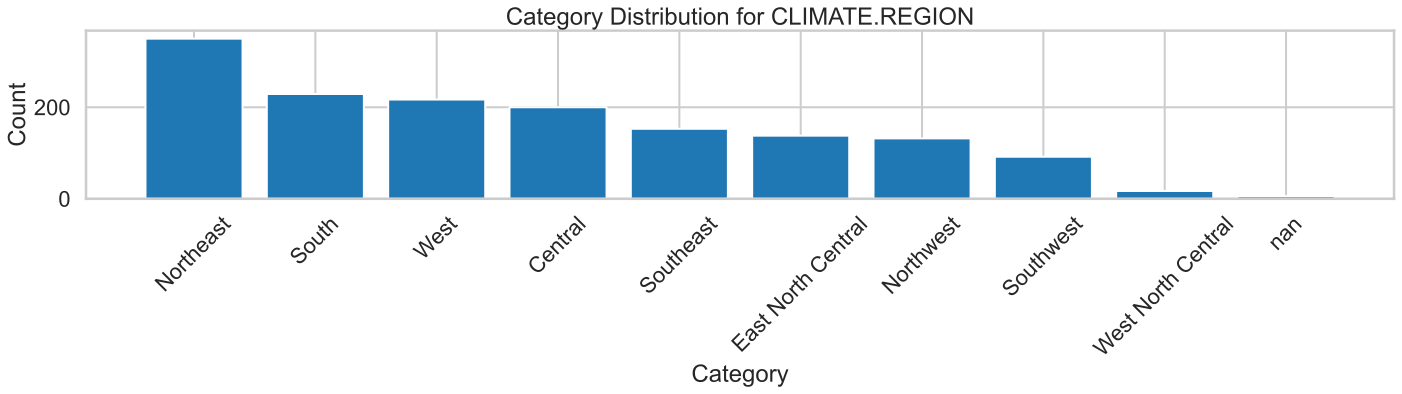

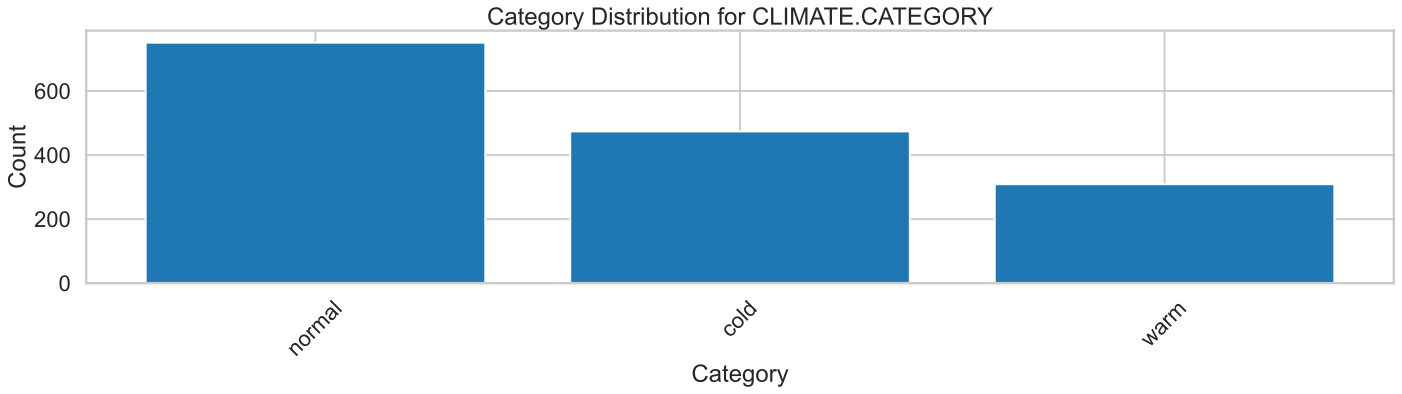

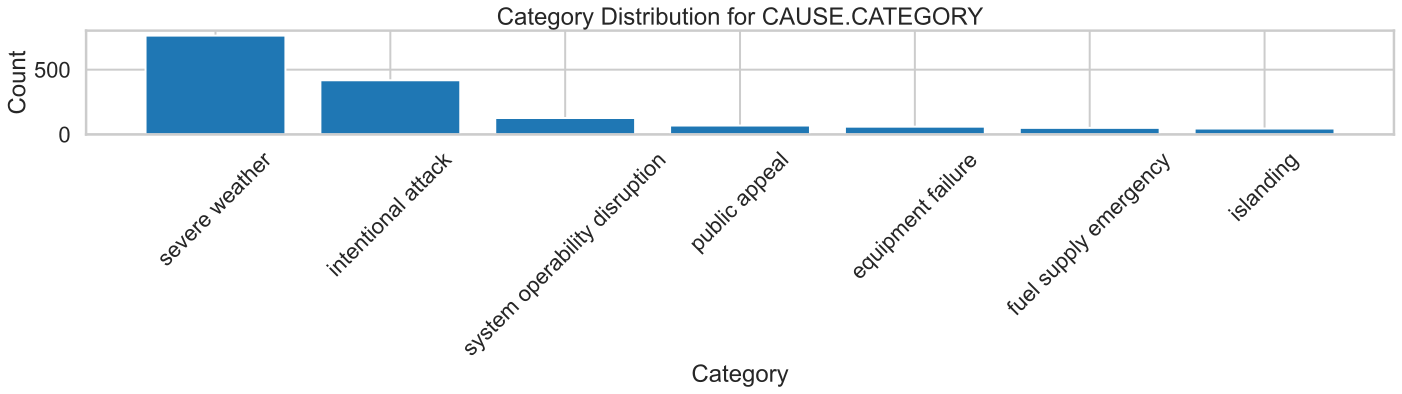

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

categorical_vars = ["CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]

for var in categorical_vars:
    counts = outage_info[var].value_counts(dropna= True)
    categories = counts.index
    values = counts.values

    plt.figure(figsize=(20, 6))
    plt.bar(categories, values)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title(f"Category Distribution for {var}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [85]:
categorical_vars = ["CLIMATE.REGION", "CLIMATE.CATEGORY", "CAUSE.CATEGORY"]

for var in categorical_vars:
    # 统计实际缺失值（NaN）
    missing_count = outage_info[var].isna().sum()
    # 统计字符串值为"na"的数量
    na_string_count = (outage_info[var] == 'nan').sum()

    print(f"{var} missing (NaN) values: {missing_count}")
    print(f"{var} 'na' string values: {na_string_count}")


CLIMATE.REGION missing (NaN) values: 0
CLIMATE.REGION 'na' string values: 0
CLIMATE.CATEGORY missing (NaN) values: 0
CLIMATE.CATEGORY 'na' string values: 0
CAUSE.CATEGORY missing (NaN) values: 0
CAUSE.CATEGORY 'na' string values: 0


In [ ]:
for var in categorical_vars:
    outage_info[var] = outage_info[var].replace('nan', np.nan)

for var in categorical_vars:
    cat_probs = outage_info[var].value_counts(normalize=True)
    
    missing_val = outage_info[var].isna()
    num_missing = missing_val.sum()
    
    if num_missing > 0 and len(cat_probs) > 0:
        imputed_values = np.random.choice(cat_probs.index, size=num_missing, p=cat_probs.values)
        outage_info.loc[missing_val, var] = imputed_values
